# 和大熊猫们(Pandas)一起游戏吧！

Pandas是Python的一个用于数据分析的库： http://pandas.pydata.org

API速查：http://pandas.pydata.org/pandas-docs/stable/api.html

基于NumPy,SciPy的功能，在其上补充了大量的数据操作（Data Manipulation）功能。

统计、分组、排序、透视表自由转换，如果你已经很熟悉结构化数据库（RDBMS）与Excel的功能，就会知道Pandas有过之而无不及！

# 0. 上手玩：Why Pandas?

普通的程序员看到一份数据会怎么做？

In [1]:
import codecs
import requests
import numpy as np
import scipy as sp
import scipy.stats as spstat
import pandas as pd
import datetime
import json

In [2]:
r = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
with codecs.open('S1EP3_Iris.txt','w',encoding='utf-8') as f:
    f.write(r.text)

In [3]:
with codecs.open('S1EP3_Iris.txt','r',encoding='utf-8') as f:
    lines = f.readlines()

for idx,line in enumerate(lines):
    print line,
    if idx==10:
        break

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa


Pandas的意义就在于

### 快速的识别结构化数据

In [4]:
import pandas as pd
irisdata = pd.read_csv('S1EP3_Iris.txt',header = None, encoding='utf-8')
irisdata

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 快速的操作元数据

In [5]:
cnames = ['sepal_length','sepal_width','petal_length','petal_width','class']
irisdata.columns = cnames
irisdata

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 快速过滤

In [6]:
irisdata[irisdata['petal_width']==irisdata.petal_width.max()]

,sepal_length,sepal_width,petal_length,petal_width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


### 快速切片

In [7]:
irisdata.iloc[::30,:2]

,sepal_length,sepal_width
0,5.1,3.5
30,4.8,3.1
60,5.0,2.0
90,5.5,2.6
120,6.9,3.2


### 快速统计

In [8]:
print irisdata['class'].value_counts()

for x in xrange(4):
    s = irisdata.iloc[:,x]
    print '{0:<12}'.format(s.name.upper()), " Statistics: ", \
    '{0:>5}  {1:>5}  {2:>5}  {3:>5}'.format(s.max(), s.min(), round(s.mean(),2),round(s.std(),2))

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
SEPAL_LENGTH  Statistics:    7.9    4.3   5.84   0.83
SEPAL_WIDTH   Statistics:    4.4    2.0   3.05   0.43
PETAL_LENGTH  Statistics:    6.9    1.0   3.76   1.76
PETAL_WIDTH   Statistics:    2.5    0.1    1.2   0.76


### 快速“MapReduce”

In [9]:
slogs = lambda x:sp.log(x)*x
entpy = lambda x:sp.exp((slogs(x.sum())-x.map(slogs).sum())/x.sum())
irisdata.groupby('class').agg(entpy)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,49.878745,49.695242,49.654909,45.810069
Iris-versicolor,49.815081,49.680665,49.694505,49.452305
Iris-virginica,49.772059,49.714500,49.761700,49.545918


# 1. 欢迎来到大熊猫世界

Pandas的重要数据类型

* DataFrame(二维表)
* Series(一维序列)
* Index(行索引，行级元数据)

### 1.1 Series：pandas的长枪(数据表中的一列或一行,观测向量,一维数组...)

数据世界中对于任意一个个体的全面观测，或者对于任意一组个体某一属性的观测，全部可以抽象为Series的概念。

用值构建一个Series：

由默认index和values组成。

In [10]:
Series1 = pd.Series(np.random.randn(4))
print Series1,type(Series1)
print Series1.index
print Series1.values

0   -0.909672
1    1.739425
2   -1.163028
3    0.408693
dtype: float64 <class 'pandas.core.series.Series'>
Int64Index([0, 1, 2, 3], dtype='int64')
[-0.90967166  1.73942495 -1.1630284   0.40869312]


#### Series支持过滤的原理就如同NumPy：

In [11]:
print Series1>0
print Series1[Series1>0]

0    False
1     True
2    False
3     True
dtype: bool
1    1.739425
3    0.408693
dtype: float64


#### 当然也支持Broadcasting：

In [12]:
print Series1*2
print Series1+5

0   -1.819343
1    3.478850
2   -2.326057
3    0.817386
dtype: float64
0    4.090328
1    6.739425
2    3.836972
3    5.408693
dtype: float64


#### 以及Universal Function：

In [13]:
print np.exp(Series1)
#NumPy Universal Function
f_np = np.frompyfunc(lambda x:np.exp(x*2+5),1,1)
print f_np(Series1)

0    0.402656
1    5.694068
2    0.312538
3    1.504850
dtype: float64
0    24.06255
1    4811.913
2    14.49702
3    336.0924
dtype: object


在序列上就使用行标，而不是创建一个2列的数据表，能够轻松辨别哪里是数据，哪里是元数据：

In [14]:
Series2 = pd.Series(Series1.values,index=['norm_'+unicode(i) for i in xrange(4)])
print Series2,type(Series2)
print Series2.index
print type(Series2.index)
print Series2.values

norm_0   -0.909672
norm_1    1.739425
norm_2   -1.163028
norm_3    0.408693
dtype: float64 <class 'pandas.core.series.Series'>
Index([u'norm_0', u'norm_1', u'norm_2', u'norm_3'], dtype='object')
<class 'pandas.core.index.Index'>
[-0.90967166  1.73942495 -1.1630284   0.40869312]


虽然行是有顺序的，但是仍然能够通过行级的index来访问到数据：

（当然也不尽然像Ordered Dict，因为行索引甚至可以重复，不推荐重复的行索引不代表不能用）

In [15]:
print Series2[['norm_0','norm_3']]

norm_0   -0.909672
norm_3    0.408693
dtype: float64


In [16]:
print 'norm_0' in Series2
print 'norm_6' in Series2

True
False


默认行索引就像行号一样：

In [17]:
print Series1.index

Int64Index([0, 1, 2, 3], dtype='int64')


从Key不重复的Ordered Dict或者从Dict来定义Series就不需要担心行索引重复：

In [18]:
Series3_Dict = {"Japan":"Tokyo","S.Korea":"Seoul","China":"Beijing"}
Series3_pdSeries = pd.Series(Series3_Dict)
print Series3_pdSeries
print Series3_pdSeries.values
print Series3_pdSeries.index

China      Beijing
Japan        Tokyo
S.Korea      Seoul
dtype: object
['Beijing' 'Tokyo' 'Seoul']
Index([u'China', u'Japan', u'S.Korea'], dtype='object')


与Dict区别一： 有序

In [19]:
Series4_IndexList = ["Japan","China","Singapore","S.Korea"]
Series4_pdSeries = pd.Series( Series3_Dict ,index = Series4_IndexList)
print Series4_pdSeries
print Series4_pdSeries.values
print Series4_pdSeries.index
print Series4_pdSeries.isnull()
print Series4_pdSeries.notnull()

Japan          Tokyo
China        Beijing
Singapore        NaN
S.Korea        Seoul
dtype: object
['Tokyo' 'Beijing' nan 'Seoul']
Index([u'Japan', u'China', u'Singapore', u'S.Korea'], dtype='object')
Japan        False
China        False
Singapore     True
S.Korea      False
dtype: bool
Japan         True
China         True
Singapore    False
S.Korea       True
dtype: bool


与Dict区别二： index内值可以重复，尽管不推荐。

In [20]:
Series5_IndexList = ['A','B','B','C']
Series5 = pd.Series(Series1.values,index = Series5_IndexList)
print Series5
print Series5[['B','A']]

A   -0.909672
B    1.739425
B   -1.163028
C    0.408693
dtype: float64
B    1.739425
B   -1.163028
A   -0.909672
dtype: float64


整个序列级别的元数据信息：name

当数据序列以及index本身有了名字，就可以更方便的进行后续的数据关联啦！

In [21]:
print Series4_pdSeries.name
print Series4_pdSeries.index.name

None
None


In [22]:
Series4_pdSeries.name = "Capital Series"
Series4_pdSeries.index.name = "Nation"
print Series4_pdSeries
pd.DataFrame(Series4_pdSeries)

Nation
Japan          Tokyo
China        Beijing
Singapore        NaN
S.Korea        Seoul
Name: Capital Series, dtype: object


,Capital Series
Nation,
Japan,Tokyo
China,Beijing
Singapore,NaN
S.Korea,Seoul


### 1.2 DataFrame：pandas的战锤(数据表，二维数组)

Series的有序集合，就像R的DataFrame一样方便。

仔细想想，绝大部分的数据形式都可以表现为DataFrame。

#### 从NumPy二维数组、从文件或者从数据库定义：数据虽好，勿忘列名

In [23]:
dataNumPy = np.asarray([('Japan','Tokyo',4000),\
                ('S.Korea','Seoul',1300),('China','Beijing',9100)])
DF1 = pd.DataFrame(dataNumPy,columns=['nation','capital','GDP'])
DF1

,nation,capital,GDP
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300
2,China,Beijing,9100


#### 等长的列数据保存在一个字典里（JSON）：很不幸，字典key是无序的

In [24]:
dataDict = {'nation':['Japan','S.Korea','China'],\
        'capital':['Tokyo','Seoul','Beijing'],'GDP':[4900,1300,9100]}
DF2 = pd.DataFrame(dataDict)
DF2

,GDP,capital,nation
0,4900,Tokyo,Japan
1,1300,Seoul,S.Korea
2,9100,Beijing,China


#### 从另一个DataFrame定义DataFrame：啊，强迫症犯了！

In [25]:
DF21 = pd.DataFrame(DF2,columns=['nation','capital','GDP'])
DF21

,nation,capital,GDP
0,Japan,Tokyo,4900
1,S.Korea,Seoul,1300
2,China,Beijing,9100


In [26]:
DF22 = pd.DataFrame(DF2,columns=['nation','capital','GDP'],index = [2,0,1])
DF22

,nation,capital,GDP
2,China,Beijing,9100
0,Japan,Tokyo,4900
1,S.Korea,Seoul,1300


#### 从DataFrame中取出列？两种方法（与JavaScript完全一致！）

* '.'的写法容易与其他预留关键字产生冲突
* '[ ]'的写法最安全。

In [27]:
print DF22.nation
print DF22.capital
print DF22['GDP']

2      China
0      Japan
1    S.Korea
Name: nation, dtype: object
2    Beijing
0      Tokyo
1      Seoul
Name: capital, dtype: object
2    9100
0    4900
1    1300
Name: GDP, dtype: int64


#### 从DataFrame中取出行？（至少）两种方法：

In [28]:
print DF22[0:1] #给出的实际是DataFrame
print DF22.ix[0] #通过对应Index给出行

  nation  capital   GDP
2  China  Beijing  9100
nation     Japan
capital    Tokyo
GDP         4900
Name: 0, dtype: object


#### 像NumPy切片一样的终极招式：iloc

In [29]:
print DF22.iloc[0,:]
print DF22.iloc[:,0]

nation       China
capital    Beijing
GDP           9100
Name: 2, dtype: object
2      China
0      Japan
1    S.Korea
Name: nation, dtype: object


#### 听说你从Alter Table地狱来，大熊猫笑了

然而动态增加列无法用"."的方式完成，只能用"[ ]"

In [30]:
DF22['population'] = [1600,130,55]
DF22['region'] = 'East_Asian'
DF22

,nation,capital,GDP,population,region
2,China,Beijing,9100,1600,East_Asian
0,Japan,Tokyo,4900,130,East_Asian
1,S.Korea,Seoul,1300,55,East_Asian


### 1.3 Index：pandas进行数据操纵的鬼牌（行级索引）

行级索引是

* 元数据
* 可能由真实数据产生，因此可以视作数据
* 可以由多重索引也就是多个列组合而成
* 可以和列名进行交换，也可以进行堆叠和展开，达到Excel透视表效果

Index有四种...哦不，很多种写法，一些重要的索引类型包括

* pd.Index（普通）
* Int64Index（数值型索引）
* MultiIndex（多重索引，在数据操纵中更详细描述）
* DatetimeIndex（以时间格式作为索引）
* PeriodIndex （含周期的时间格式作为索引）

#### 直接定义普通索引，长得就和普通的Series一样

In [31]:
index_names = ['a','b','c']
Series_for_Index = pd.Series(index_names)
print pd.Index(index_names)
print pd.Index(Series_for_Index)

Index([u'a', u'b', u'c'], dtype='object')
Index([u'a', u'b', u'c'], dtype='object')


#### 可惜Immutable，牢记！

In [32]:
index_names = ['a','b','c']
index0 = pd.Index(index_names)
print index0.get_values()
index0[2] = 'd'

['a' 'b' 'c']


TypeError: Indexes does not support mutable operations

#### 扔进去一个含有多元组的List，就有了MultiIndex

可惜，如果这个List Comprehension改成小括号，就不对了。

In [33]:
#print [('Row_'+str(x+1),'Col_'+str(y+1)) for x in xrange(4) for y in xrange(4)]
multi1 = pd.Index([('Row_'+str(x+1),'Col_'+str(y+1)) for x in xrange(4) for y in xrange(4)])
multi1.name = ['index1','index2']
print multi1

MultiIndex(levels=[[u'Row_1', u'Row_2', u'Row_3', u'Row_4'], [u'Col_1', u'Col_2', u'Col_3', u'Col_4']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])


#### 对于Series来说，如果拥有了多重Index，数据，变形！

下列代码说明：

* 二重MultiIndex的Series可以unstack()成DataFrame
* DataFrame可以stack成拥有二重MultiIndex的Series

In [34]:
data_for_multi1 = pd.Series(xrange(0,16),index=multi1)
data_for_multi1

Row_1  Col_1     0
       Col_2     1
       Col_3     2
       Col_4     3
Row_2  Col_1     4
       Col_2     5
       Col_3     6
       Col_4     7
Row_3  Col_1     8
       Col_2     9
       Col_3    10
       Col_4    11
Row_4  Col_1    12
       Col_2    13
       Col_3    14
       Col_4    15
dtype: int64

In [35]:
data_for_multi1.unstack()

,Col_1,Col_2,Col_3,Col_4
Row_1,0,1,2,3
Row_2,4,5,6,7
Row_3,8,9,10,11
Row_4,12,13,14,15


In [36]:
data_for_multi1.unstack().stack()

Row_1  Col_1     0
       Col_2     1
       Col_3     2
       Col_4     3
Row_2  Col_1     4
       Col_2     5
       Col_3     6
       Col_4     7
Row_3  Col_1     8
       Col_2     9
       Col_3    10
       Col_4    11
Row_4  Col_1    12
       Col_2    13
       Col_3    14
       Col_4    15
dtype: int64

我们来看一下非平衡数据的例子：

Row_1,2,3,4和Col_1,2,3,4并不是全组合的。

In [37]:
multi2 = pd.Index([('Row_'+str(x),'Col_'+str(y+1)) \
                   for x in xrange(5) for y in xrange(x)])
multi2

MultiIndex(levels=[[u'Row_1', u'Row_2', u'Row_3', u'Row_4'], [u'Col_1', u'Col_2', u'Col_3', u'Col_4']],
           labels=[[0, 1, 1, 2, 2, 2, 3, 3, 3, 3], [0, 0, 1, 0, 1, 2, 0, 1, 2, 3]])

In [38]:
data_for_multi2 = pd.Series(np.arange(10),index = multi2)
data_for_multi2

Row_1  Col_1    0
Row_2  Col_1    1
       Col_2    2
Row_3  Col_1    3
       Col_2    4
       Col_3    5
Row_4  Col_1    6
       Col_2    7
       Col_3    8
       Col_4    9
dtype: int64

In [39]:
data_for_multi2.unstack()

,Col_1,Col_2,Col_3,Col_4
Row_1,0,NaN,NaN,NaN
Row_2,1,2,NaN,NaN
Row_3,3,4,5,NaN
Row_4,6,7,8,9


In [40]:
data_for_multi2.unstack().stack()

Row_1  Col_1    0
Row_2  Col_1    1
       Col_2    2
Row_3  Col_1    3
       Col_2    4
       Col_3    5
Row_4  Col_1    6
       Col_2    7
       Col_3    8
       Col_4    9
dtype: float64

#### DateTime标准库如此好用，你值得拥有

In [41]:
dates = [datetime.datetime(2015,1,1),datetime.datetime(2015,1,8),datetime.datetime(2015,1,30)]
pd.DatetimeIndex(dates)

DatetimeIndex(['2015-01-01', '2015-01-08', '2015-01-30'], dtype='datetime64[ns]', freq=None, tz=None)

#### 如果你不仅需要时间格式统一，时间频率也要统一的话

In [42]:
periodindex1 = pd.period_range('2015-01','2015-04',freq='M')
print periodindex1

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04'], dtype='int64', freq='M')


#### 月级精度和日级精度如何转换？

有的公司统一以1号代表当月，有的公司统一以最后一天代表当月，转化起来很麻烦，可以asfreq

In [43]:
print periodindex1.asfreq('D',how='start')
print periodindex1.asfreq('D',how='end')

PeriodIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01'], dtype='int64', freq='D')
PeriodIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30'], dtype='int64', freq='D')


#### 最后的最后，我要真正把两种频率的时间精度匹配上？

In [44]:
periodindex_mon = pd.period_range('2015-01','2015-03',freq='M').asfreq('D',how='start')
periodindex_day = pd.period_range('2015-01-01','2015-03-31',freq='D')

print periodindex_mon
print periodindex_day

PeriodIndex(['2015-01-01', '2015-02-01', '2015-03-01'], dtype='int64', freq='D')
PeriodIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
             '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
             '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
             '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
             '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
             '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
             '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
             '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
             '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
             '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
             '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
             '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
             '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
             '2015-02-

#### 粗粒度数据＋reindex＋ffill/bfill

In [45]:
#print pd.Series(periodindex_mon,index=periodindex_mon).reindex(periodindex_day)
full_ts = pd.Series(periodindex_mon,index=periodindex_mon).reindex(periodindex_day)
full_ts

2015-01-01    2015-01-01
2015-01-02           NaN
2015-01-03           NaN
2015-01-04           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
2015-01-09           NaN
2015-01-10           NaN
2015-01-11           NaN
2015-01-12           NaN
2015-01-13           NaN
2015-01-14           NaN
2015-01-15           NaN
2015-01-16           NaN
2015-01-17           NaN
2015-01-18           NaN
2015-01-19           NaN
2015-01-20           NaN
2015-01-21           NaN
2015-01-22           NaN
2015-01-23           NaN
2015-01-24           NaN
2015-01-25           NaN
2015-01-26           NaN
2015-01-27           NaN
2015-01-28           NaN
2015-01-29           NaN
2015-01-30           NaN
                 ...    
2015-03-02           NaN
2015-03-03           NaN
2015-03-04           NaN
2015-03-05           NaN
2015-03-06           NaN
2015-03-07           NaN
2015-03-08           NaN
2015-03-09           NaN
2015-03-10           NaN


In [46]:
full_ts = pd.Series(periodindex_mon,index=periodindex_mon).reindex(periodindex_day,method='ffill')
full_ts

2015-01-01    2015-01-01
2015-01-02    2015-01-01
2015-01-03    2015-01-01
2015-01-04    2015-01-01
2015-01-05    2015-01-01
2015-01-06    2015-01-01
2015-01-07    2015-01-01
2015-01-08    2015-01-01
2015-01-09    2015-01-01
2015-01-10    2015-01-01
2015-01-11    2015-01-01
2015-01-12    2015-01-01
2015-01-13    2015-01-01
2015-01-14    2015-01-01
2015-01-15    2015-01-01
2015-01-16    2015-01-01
2015-01-17    2015-01-01
2015-01-18    2015-01-01
2015-01-19    2015-01-01
2015-01-20    2015-01-01
2015-01-21    2015-01-01
2015-01-22    2015-01-01
2015-01-23    2015-01-01
2015-01-24    2015-01-01
2015-01-25    2015-01-01
2015-01-26    2015-01-01
2015-01-27    2015-01-01
2015-01-28    2015-01-01
2015-01-29    2015-01-01
2015-01-30    2015-01-01
                 ...    
2015-03-02    2015-03-01
2015-03-03    2015-03-01
2015-03-04    2015-03-01
2015-03-05    2015-03-01
2015-03-06    2015-03-01
2015-03-07    2015-03-01
2015-03-08    2015-03-01
2015-03-09    2015-03-01
2015-03-10    2015-03-01


#### 关于索引，方便的操作有？

前面描述过了，索引有序，重复，但一定程度上又能通过key来访问，也就是说，某些集合操作都是可以支持的。

In [47]:
index1 = pd.Index(['A','B','B','C','C'])
index2 = pd.Index(['C','D','E','E','F'])
index3 = pd.Index(['B','C','A'])
print index1.append(index2)
print index1.difference(index2)
print index1.intersection(index2)
print index1.union(index2) # Support unique-value Index well
print index1.isin(index2)
print index1.delete(2)
print index1.insert(0,'K') # Not suggested
print index3.drop('A') # Support unique-value Index well
print index1.is_monotonic,index2.is_monotonic,index3.is_monotonic
print index1.is_unique,index2.is_unique,index3.is_unique

Index([u'A', u'B', u'B', u'C', u'C', u'C', u'D', u'E', u'E', u'F'], dtype='object')
Index([u'A', u'B'], dtype='object')
Index([u'C', u'C'], dtype='object')
Index([u'A', u'B', u'B', u'C', u'C', u'D', u'E', u'E', u'F'], dtype='object')
[False False False  True  True]
Index([u'A', u'B', u'C', u'C'], dtype='object')
Index([u'K', u'A', u'B', u'B', u'C', u'C'], dtype='object')
Index([u'B', u'C'], dtype='object')
True True False
False False True


# 2. 大熊猫世界来去自如：Pandas的I/O

老生常谈，从基础来看，我们仍然关心pandas对于与外部数据是如何交互的。

### 2.1 结构化数据输入输出

* read_csv与to_csv 是一对输入输出的工具，read_csv直接返回pandas.DataFrame，而to_csv只要执行命令即可写文件
  * read_table：功能类似
  * read_fwf：操作fixed width file
* read_excel与to_excel方便的与excel交互

还记得刚开始的例子吗？

* header 表示数据中是否存在列名，如果在第0行就写就写0，并且开始读数据时跳过相应的行数，不存在可以写none
* names 表示要用给定的列名来作为最终的列名
* encoding 表示数据集的字符编码，通常而言一份数据为了方便的进行文件传输都以utf-8作为标准

提问：下列例子中，header=4，names=cnames时，究竟会读到怎样的数据？

In [48]:
print cnames
irisdata = pd.read_csv('S1EP3_Iris.txt',header = None, names = cnames,\
                       encoding='utf-8')
irisdata[::30]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica


希望了解全部参数的请移步API：

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

这里介绍一些常用的参数：

读取处理：

* skiprows：跳过一定的行数
* nrows：仅读取一定的行数
* skipfooter：尾部有固定的行数永不读取
* skip_blank_lines：空行跳过

内容处理：

* sep/delimiter：分隔符很重要，常见的有逗号，空格和Tab('\t')
* na_values：指定应该被当作na_values的数值
* thousands：处理数值类型时，每千位分隔符并不统一 (1.234.567,89或者1,234,567.89都可能)，此时要把字符串转化为数字需要指明千位分隔符

收尾处理：

* index_col：将真实的某列（列的数目，甚至列名）当作index
* squeeze：仅读到一列时，不再保存为pandas.DataFrame而是pandas.Series


### 2.1.x Excel ... ?

对于存储着极为规整数据的Excel而言，其实是没必要一定用Excel来存，尽管Pandas也十分友好的提供了I/O接口。

In [49]:
irisdata.to_excel('S1EP3_irisdata.xls',index = None,encoding='utf-8')
irisdata_from_excel = pd.read_excel('S1EP3_irisdata.xls',header=0, encoding='utf-8')
irisdata_from_excel[::30]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica


唯一重要的参数：sheetname=k，标志着一个excel的第k个sheet页将会被取出。（从0开始）

### 2.2 半结构化数据

JSON：网络传输中常用的一种数据格式。

仔细看一下，实际上这就是我们平时收集到异源数据的风格是一致的：

* 列名不能完全匹配
* 关联键可能并不唯一
* 元数据被保存在数据里

In [50]:
json_data = [{'name':'Wang','sal':50000,'job':'VP'},\
             {'name':'Zhang','job':'Manager','report':'VP'},\
             {'name':'Li','sal':5000,'report':'Manager'}]
data_employee = pd.read_json(json.dumps(json_data))
data_employee_ri = data_employee.reindex(columns=['name','job','sal','report'])
data_employee_ri

,name,job,sal,report
0,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager


### 2.3 数据库连接流程（Optional）

使用下列包，通过数据库配置建立Connection

* pymysql
* pyODBC
* cx_Oracle

通过pandas.read_sql_query,read_sql_table,to_sql进行数据库操作。

Python与数据库的交互方案有很多种，从数据分析师角度看pandas方案比较适合，之后的讲义中会结合SQL语法进行讲解。

进行数据库连接首先你需要类似的这样一组信息：

In [ ]:
IP = '127.0.0.1'
us = 'root'
pw = '123456'

举例说明如果是MySQL：

In [ ]:
import pymysql
import pymysql.cursors
connection = pymysql.connect(host=IP,\
                             user=us,\
                             password=pw,\
                             charset='utf8mb4',\
                             cursorclass=pymysql.cursors.DictCursor)
#pd.read_sql_query("sql",connection)
#df.to_sql('tablename',connection,flavor='mysql')

# 3. 深入Pandas数据操纵

在第一部分的基础上，数据会有更多种操纵方式：

* 通过列名、行index来取数据，结合ix、iloc灵活的获取数据的一个子集（第一部分已经介绍）
* 按记录拼接（就像Union All）或者关联（join）
* 方便的自定义函数映射
* 排序
* 缺失值处理
* 与Excel一样灵活的数据透视表（在第四部分更详细介绍）

### 3.1 数据整合：方便灵活

### 3.1.1 横向拼接：直接DataFrame

In [51]:
pd.DataFrame([np.random.rand(2),np.random.rand(2),np.random.rand(2)],columns=['C1','C2'])

,C1,C2
0,0.958384,0.826066
1,0.607771,0.687302
2,0.943502,0.647464


### 3.1.2 横向拼接：Concatenate

In [52]:
pd.concat([data_employee_ri,data_employee_ri,data_employee_ri])

,name,job,sal,report
0,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager
0,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager
0,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager


In [53]:
pd.concat([data_employee_ri,data_employee_ri,data_employee_ri],ignore_index=True)

,name,job,sal,report
0,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager
3,Wang,VP,50000,NaN
4,Zhang,Manager,NaN,VP
5,Li,NaN,5000,Manager
6,Wang,VP,50000,NaN
7,Zhang,Manager,NaN,VP
8,Li,NaN,5000,Manager


### 3.1.3 纵向拼接：Merge

根据数据列关联，使用on关键字

* 可以指定一列或多列
* 可以使用left_on和right_on

In [54]:
pd.merge(data_employee_ri,data_employee_ri,on='name')

,name,job_x,sal_x,report_x,job_y,sal_y,report_y
0,Wang,VP,50000,NaN,VP,50000,NaN
1,Zhang,Manager,NaN,VP,Manager,NaN,VP
2,Li,NaN,5000,Manager,NaN,5000,Manager


In [55]:
pd.merge(data_employee_ri,data_employee_ri,on=['name','job'])

,name,job,sal_x,report_x,sal_y,report_y
0,Wang,VP,50000,NaN,50000,NaN
1,Zhang,Manager,NaN,VP,NaN,VP
2,Li,NaN,5000,Manager,5000,Manager


根据index关联，可以直接使用left_index和right_index

In [56]:
data_employee_ri.index.name = 'index1'
pd.merge(data_employee_ri,data_employee_ri,\
         left_index='index1',right_index='index1')

,name_x,job_x,sal_x,report_x,name_y,job_y,sal_y,report_y
index1,,,,,,,,
0,Wang,VP,50000,NaN,Wang,VP,50000,NaN
1,Zhang,Manager,NaN,VP,Zhang,Manager,NaN,VP
2,Li,NaN,5000,Manager,Li,NaN,5000,Manager


TIPS: 增加how关键字，并指定
* how = 'inner'
* how = 'left'
* how = 'right'
* how = 'outer'

结合how，可以看到merge基本再现了SQL应有的功能，并保持代码整洁。

In [57]:
DF31xA = pd.DataFrame({'name':[u'老王',u'老张',u'老李'],'sal':[5000,3000,1000]})
DF31xA

,name,sal
0,老王,5000
1,老张,3000
2,老李,1000


In [58]:
DF31xB = pd.DataFrame({'name':[u'老王',u'老刘'],'job':['VP','Manager']})
DF31xB

,job,name
0,VP,老王
1,Manager,老刘


how='left': 保留左表信息

In [59]:
pd.merge(DF31xA,DF31xB,on='name',how='left')

,name,sal,job
0,老王,5000,VP
1,老张,3000,NaN
2,老李,1000,NaN


how='right': 保留右表信息

In [60]:
pd.merge(DF31xA,DF31xB,on='name',how='right')

,name,sal,job
0,老王,5000,VP
1,老刘,NaN,Manager


how='inner': 保留两表交集信息，这样尽量避免出现缺失值

In [61]:
pd.merge(DF31xA,DF31xB,on='name',how='inner')

,name,sal,job
0,老王,5000,VP


how='outer': 保留两表并集信息，这样会导致缺失值，但最大程度的整合了已有信息

In [62]:
pd.merge(DF31xA,DF31xB,on='name',how='outer')

,name,sal,job
0,老王,5000,VP
1,老张,3000,NaN
2,老李,1000,NaN
3,老刘,NaN,Manager


### 3.2 数据清洗三剑客

接下来的三个功能，**map**,**applymap**,**apply**,功能，是绝大多数数据分析师在数据清洗这一步骤中的必经之路。

他们分别回答了以下问题：

* 我想根据一列数据新做一列数据，怎么办？（Series->Series）
* 我想根据整张表的数据新做整张表，怎么办？ （DataFrame->DataFrame）
* 我想根据很多列的数据新做一列数据，怎么办？ （DataFrame->Series）

不要再写什么for循环了！改变思维，提高编码和执行效率

In [63]:
dataNumPy32 = np.asarray([('Japan','Tokyo',4000),('S.Korea','Seoul',1300),('China','Beijing',9100)])
DF32 = pd.DataFrame(dataNumPy,columns=['nation','capital','GDP'])
DF32

,nation,capital,GDP
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300
2,China,Beijing,9100


### map: 以相同规则将一列数据作一个映射，也就是进行相同函数的处理

In [64]:
def GDP_Factorize(v):
    fv = np.float64(v)
    if fv > 6000.0:
        return 'High'
    elif fv < 2000.0:
        return 'Low'
    else:
        return 'Medium'

DF32['GDP_Level'] = DF32['GDP'].map(GDP_Factorize)
DF32['NATION'] = DF32.nation.map(str.upper)
DF32

,nation,capital,GDP,GDP_Level,NATION
0,Japan,Tokyo,4000,Medium,JAPAN
1,S.Korea,Seoul,1300,Low,S.KOREA
2,China,Beijing,9100,High,CHINA


### 类似的功能还有applymap，可以对一个dataframe里面每一个元素像map那样全局操作

In [65]:
DF32.applymap(lambda x: float(x)*2 if x.isdigit() else x.upper())

,nation,capital,GDP,GDP_Level,NATION
0,JAPAN,TOKYO,8000,MEDIUM,JAPAN
1,S.KOREA,SEOUL,2600,LOW,S.KOREA
2,CHINA,BEIJING,18200,HIGH,CHINA


### apply则可以对一个DataFrame操作得到一个Series

他会有点像我们后面介绍的agg,但是apply可以按行操作和按列操作，用axis控制即可。

In [66]:
DF32.apply(lambda x:x['nation']+x['capital']+'_'+x['GDP'],axis=1)

0      JapanTokyo_4000
1    S.KoreaSeoul_1300
2    ChinaBeijing_9100
dtype: object

### 3.3 数据排序

* sort: 按一列或者多列的值进行行级排序
* sort_index: 根据index里的取值进行排序，而且可以根据axis决定是重排行还是列

In [67]:
dataNumPy33 = np.asarray([('Japan','Tokyo',4000),('S.Korea','Seoul',1300),('China','Beijing',9100)])
DF33 = pd.DataFrame(dataNumPy33,columns=['nation','capital','GDP'])
DF33

,nation,capital,GDP
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300
2,China,Beijing,9100


In [68]:
DF33.sort(['capital','nation'])

,nation,capital,GDP
2,China,Beijing,9100
1,S.Korea,Seoul,1300
0,Japan,Tokyo,4000


In [69]:
DF33.sort('GDP',ascending=False)

,nation,capital,GDP
2,China,Beijing,9100
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300


In [70]:
DF33.sort('GDP').sort(ascending=False)

,nation,capital,GDP
2,China,Beijing,9100
1,S.Korea,Seoul,1300
0,Japan,Tokyo,4000


In [71]:
DF33.sort_index(axis=1,ascending=True)

,GDP,capital,nation
0,4000,Tokyo,Japan
1,1300,Seoul,S.Korea
2,9100,Beijing,China


一个好用的功能：Rank

In [72]:
DF33

,nation,capital,GDP
0,Japan,Tokyo,4000
1,S.Korea,Seoul,1300
2,China,Beijing,9100


In [73]:
DF33.rank()

,nation,capital,GDP
0,2,3,2
1,3,2,1
2,1,1,3


In [74]:
DF33.rank(ascending=False)

,nation,capital,GDP
0,2,1,2
1,1,2,3
2,3,3,1


注意tied data（相同值）的处理：
* method = 'average'
* method = 'min'
* method = 'max'
* method = 'first'

In [75]:
DF33x = pd.DataFrame({'name':[u'老王',u'老张',u'老李',u'老刘'],'sal':np.array([5000,3000,5000,9000])})
DF33x

,name,sal
0,老王,5000
1,老张,3000
2,老李,5000
3,老刘,9000


DF33x.rank()默认使用method='average'，两条数据相等时，处理排名时大家都用平均值

In [76]:
DF33x.sal.rank()

0    2.5
1    1.0
2    2.5
3    4.0
Name: sal, dtype: float64

method='min'，处理排名时大家都用最小值

In [77]:
DF33x.sal.rank(method='min')

0    2
1    1
2    2
3    4
Name: sal, dtype: float64

method='max'，处理排名时大家都用最大值

In [78]:
DF33x.sal.rank(method='max')

0    3
1    1
2    3
3    4
Name: sal, dtype: float64

method='first'，处理排名时谁先出现就先给谁较小的数值。

In [79]:
DF33x.sal.rank(method='first')

0    2
1    1
2    3
3    4
Name: sal, dtype: float64

### 3.4 缺失数据处理

In [80]:
DF34 = data_for_multi2.unstack()
DF34

,Col_1,Col_2,Col_3,Col_4
Row_1,0,NaN,NaN,NaN
Row_2,1,2,NaN,NaN
Row_3,3,4,5,NaN
Row_4,6,7,8,9


忽略缺失值：

In [81]:
DF34.mean(skipna=True)

Col_1    2.500000
Col_2    4.333333
Col_3    6.500000
Col_4    9.000000
dtype: float64

In [82]:
DF34.mean(skipna=False)

Col_1    2.5
Col_2    NaN
Col_3    NaN
Col_4    NaN
dtype: float64

如果不想忽略缺失值的话，就需要祭出fillna了：

In [83]:
DF34

,Col_1,Col_2,Col_3,Col_4
Row_1,0,NaN,NaN,NaN
Row_2,1,2,NaN,NaN
Row_3,3,4,5,NaN
Row_4,6,7,8,9


In [84]:
DF34.fillna(0).mean(axis=1,skipna=False)

Row_1    0.00
Row_2    0.75
Row_3    3.00
Row_4    7.50
dtype: float64

# 4. “一组”大熊猫：Pandas的groupby

groupby的功能类似SQL的group by关键字：

Split-Apply-Combine

* Split，就是按照规则分组
* Apply，通过一定的agg函数来获得输入pd.Series返回一个值的效果
* Combine，把结果收集起来

Pandas的groupby的灵活性：

* 分组的关键字可以来自于index，也可以来自于真实的列数据
* 分组规则可以通过一列或者多列

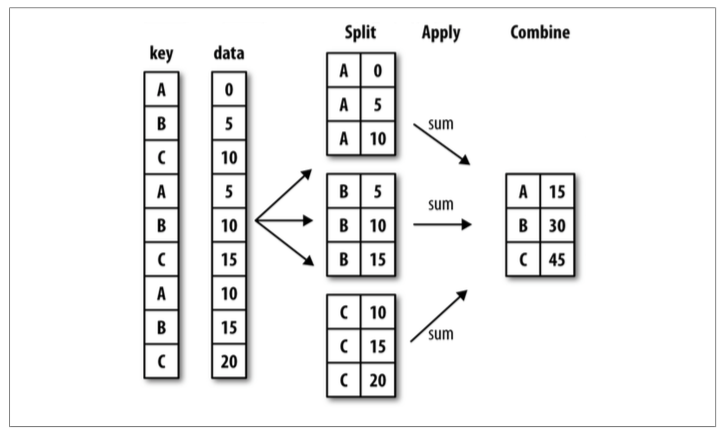

In [85]:
from IPython.display import Image
Image(filename="S1EP3_group.png")

分组的具体逻辑

In [86]:
irisdata_group = irisdata.groupby('class')
irisdata_group

In [87]:
for level,subsetDF in irisdata_group:
    print level
    print subsetDF[::20]

Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
40           5.0          3.5           1.3          0.3  Iris-setosa
Iris-versicolor
    sepal_length  sepal_width  petal_length  petal_width            class
50           7.0          3.2           4.7          1.4  Iris-versicolor
70           5.9          3.2           4.8          1.8  Iris-versicolor
90           5.5          2.6           4.4          1.2  Iris-versicolor
Iris-virginica
     sepal_length  sepal_width  petal_length  petal_width           class
100           6.3          3.3           6.0          2.5  Iris-virginica
120           6.9          3.2           5.7          2.3  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica


分组可以快速实现MapReduce的逻辑

* Map: 指定分组的列标签，不同的值就会被扔到不同的分组处理
* Reduce: 输入多个值，返回一个值，一般可以通过agg实现，agg能接受一个函数

In [88]:
irisdata.groupby('class').agg(\
    lambda x:((x-x.mean())**3).sum()*(len(x)-0.0)/\
                (len(x)-1.0)/(len(x)-2.0)/(x.std()*np.sqrt((len(x)-0.0)/(len(x)-1.0)))**3 if len(x)>2 else None)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.116502,0.103857,0.069702,1.161506
Iris-versicolor,0.102232,-0.352014,-0.588404,-0.030249
Iris-virginica,0.114492,0.355026,0.533044,-0.125612


In [89]:
irisdata.groupby('class').agg(spstat.skew)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.116454,0.103814,0.069673,1.161022
Iris-versicolor,0.102190,-0.351867,-0.588159,-0.030236
Iris-virginica,0.114445,0.354878,0.532822,-0.125560


#### 汇总之后的广播操作

在OLAP数据库上，为了避免groupby+join的二次操作，提出了sum()over(partition by)的开窗操作。

在Pandas中，这种操作能够进一步被transform所取代。

In [90]:
pd.concat([irisdata,irisdata.groupby('class').transform('mean')],axis=1)[::20]

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,5.006,3.418,1.464,0.244
20,5.4,3.4,1.7,0.2,Iris-setosa,5.006,3.418,1.464,0.244
40,5.0,3.5,1.3,0.3,Iris-setosa,5.006,3.418,1.464,0.244
60,5.0,2.0,3.5,1.0,Iris-versicolor,5.936,2.770,4.260,1.326
80,5.5,2.4,3.8,1.1,Iris-versicolor,5.936,2.770,4.260,1.326
100,6.3,3.3,6.0,2.5,Iris-virginica,6.588,2.974,5.552,2.026
120,6.9,3.2,5.7,2.3,Iris-virginica,6.588,2.974,5.552,2.026
140,6.7,3.1,5.6,2.4,Iris-virginica,6.588,2.974,5.552,2.026


#### 产生 MultiIndex（多列分组）后的数据透视表操作

一般来说，多列groupby的一个副作用就是.groupby().agg()之后你的行index已经变成了一个多列分组的分级索引。

如果我们希望达到Excel的数据透视表的效果，行和列的索引自由交换，达到统计目的，究竟应该怎么办呢？

In [91]:
factor1 = np.random.randint(0,3,50)
factor2 = np.random.randint(0,2,50)
factor3 = np.random.randint(0,3,50)
values = np.random.randn(50)

In [92]:
hierindexDF = pd.DataFrame({'F1':factor1,'F2':factor2,'F3':factor3,'F4':values})
hierindexDF

,F1,F2,F3,F4
0,1,0,1,-0.083928
1,0,0,0,0.949984
2,2,1,0,-0.037692
3,0,1,1,-0.518305
4,1,0,0,0.963678
5,1,1,1,-0.284463
6,0,0,1,0.412449
7,2,0,0,-0.277126
8,0,0,2,-2.488946
9,0,1,0,0.167413


In [93]:
hierindexDF_gbsum = hierindexDF.groupby(['F1','F2','F3']).sum()
hierindexDF_gbsum

F4
F1 F2 F3          
0  0  0   1.155121
      1  -0.692009
      2  -4.465664
   1  0  -0.455089
      1   0.007813
      2  -2.314989
1  0  0   1.517987
      1   0.028374
      2  -0.892030
   1  0  -1.708468
      1  -2.634460
      2   1.686941
2  0  0  -0.116412
      1  -0.508761
      2  -3.070037
   1  0  -0.037692
      1  -0.210722
      2  -1.324281

观察Index：

In [94]:
hierindexDF_gbsum.index

MultiIndex(levels=[[0, 1, 2], [0, 1], [0, 1, 2]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=[u'F1', u'F2', u'F3'])

unstack：

* 无参数时，把最末index置换到column上
* 有数字参数时，把指定位置的index置换到column上
* 有列表参数时，依次把特定位置的index置换到column上

In [95]:
hierindexDF_gbsum.unstack()

F4                    
F3            0         1         2
F1 F2                              
0  0   1.155121 -0.692009 -4.465664
   1  -0.455089  0.007813 -2.314989
1  0   1.517987  0.028374 -0.892030
   1  -1.708468 -2.634460  1.686941
2  0  -0.116412 -0.508761 -3.070037
   1  -0.037692 -0.210722 -1.324281

In [96]:
hierindexDF_gbsum.unstack(0)

F4                    
F1            0         1         2
F2 F3                              
0  0   1.155121  1.517987 -0.116412
   1  -0.692009  0.028374 -0.508761
   2  -4.465664 -0.892030 -3.070037
1  0  -0.455089 -1.708468 -0.037692
   1   0.007813 -2.634460 -0.210722
   2  -2.314989  1.686941 -1.324281

In [97]:
hierindexDF_gbsum.unstack(1)

F4          
F2            0         1
F1 F3                    
0  0   1.155121 -0.455089
   1  -0.692009  0.007813
   2  -4.465664 -2.314989
1  0   1.517987 -1.708468
   1   0.028374 -2.634460
   2  -0.892030  1.686941
2  0  -0.116412 -0.037692
   1  -0.508761 -0.210722
   2  -3.070037 -1.324281

In [98]:
hierindexDF_gbsum.unstack([2,0])

F4                                                              \
F3         0         1         2         0         1         2         0   
F1         0         0         0         1         1         1         2   
F2                                                                         
0   1.155121 -0.692009 -4.465664  1.517987  0.028374 -0.892030 -0.116412   
1  -0.455089  0.007813 -2.314989 -1.708468 -2.634460  1.686941 -0.037692   

                        
F3         1         2  
F1         2         2  
F2                      
0  -0.508761 -3.070037  
1  -0.210722 -1.324281

更进一步的，stack的功能是和unstack对应，把column上的多级索引换到index上去

In [99]:
hierindexDF_gbsum.unstack([2,0]).stack([1,2])

F4
F2 F3 F1          
0  0  0   1.155121
      1   1.517987
      2  -0.116412
   1  0  -0.692009
      1   0.028374
      2  -0.508761
   2  0  -4.465664
      1  -0.892030
      2  -3.070037
1  0  0  -0.455089
      1  -1.708468
      2  -0.037692
   1  0   0.007813
      1  -2.634460
      2  -0.210722
   2  0  -2.314989
      1   1.686941
      2  -1.324281